### **《信息论》** _Claude Shannon's_ **《Information Theory》**

1. 信息：定义为减少不确定性的量。

2. 一个事件的**信息量**与其发生的**概率**有关。越不可能发生的事件，发生时提供的信息量越大。 $I(x) = -log_{2}(p(x))$

3. **熵 Entropy**: 表示平均信息量（或不确定性）。
    对于一个离散随机变量 $X$，及其分布概率 $p(x)$ ，熵的公式定义为：$H(X) = - \sum p(x) log_{2}(p(x))$。熵越高，系统的随机性（或不确定性）越大。


现代的电报通讯、ZIP文件压缩、JPEG图像压缩、密码学等都来自于香农信息论这个原理。其主要关注的是数据都统计特性，而不考虑信息的语义或提取其所需的计算成本。比如，


- 一段sha256加密的密钥文本
- 一段身份证号码

后来香农熵又推广到了量子信息领域：量子比特（Qubit）和量子熵等。

一个值得注意的点，在香农熵看来两者的具有相同的信息量。但是如果真要提取他们各自的语义信息则所需的计算资源完全不同。


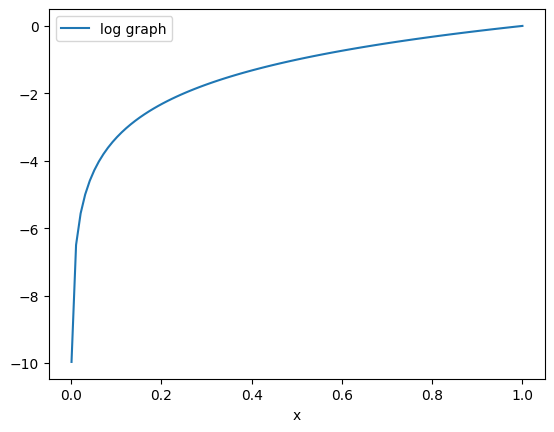

-0.3979400086720376 —— 10为底数的0.4对数值
-0.916290731874155 —— 自然数e为底数的0.4对数值
-1.3219280948873622 —— 2为底数的0.4对数值


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x values (non-negative values up to 1)
x = np.linspace(0.001, 1, 100)

# Define the function graph
y = np.log2(x)

# Plot the graph of y vs x
plt.plot(x, y, label='log graph')

# Add labels and legend
plt.xlabel('x')
plt.legend()

# Show the plot
plt.show()

print(f"{np.log10(0.4)} —— 10为底数的0.4对数值")
print(f"{np.log(0.4)} —— 自然数e为底数的0.4对数值")
print(f"{np.log2(0.4)} —— 2为底数的0.4对数值")

### 互信息

对于两个离散随机变量 $X$ 和 $Y$（分别取值 $x_{i}$ 和 $y_{i}$），互信息 $I(X;Y)$ 定义为：

$$
I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right)
$$

对于连续随机变量，求和变为积分：

$$
I(X;Y) = \iint p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right) \, dx \, dy
$$

### 互信息的等价形式

互信息可以用熵（Entropy）和条件熵（Conditional Entropy）表达，具有以下几种等价定义：

#### 1. 基于熵的定义：

$$
I(X;Y) = H(X) + H(Y) - H(X,Y)
$$

- $H(X)$：$X$ 的熵（不确定性）。
- $H(Y)$：$Y$ 的熵。
- $H(X,Y)$：$X$ 和 $Y$ 的联合熵。
- **意义**：互信息是单独熵之和减去联合熵，表示两变量的冗余信息。

---

#### 2. 基于条件熵的定义：

$$
I(X;Y) = H(X) - H(X|Y)
$$

- $H(X|Y)$：给定 $Y$ 后 $X$ 的条件熵。
- **意义**：互信息是 $Y$ 减少的关于 $X$ 的不确定性。

同样地：

$$
I(X;Y) = H(Y) - H(Y|X)
$$


- **非负性**：
  - $I(X;Y) \geq 0$：互信息总是非负的，因为依赖性不会增加不确定性。
  - 当 $X$ 和 $Y$ 独立时，$I(X;Y) = 0$。


- **上限**：
  - $I(X;Y) \leq H(X)$ 和 $I(X;Y) \leq H(Y)$：互信息不会超过任一变量的熵。
  - 如果 $X = Y$（完全相关），则 $I(X;Y) = H(X) = H(Y)$。


- **对称性**：
  - $I(X;Y) = I(Y;X)$：互信息不区分变量的先后顺序。


- **单位**：
  - 以 $\log_2$ 计算时，单位是比特；
  - 用自然对数（$\ln$）时，单位是奈特（nats）。




### 机器学习中的应用：

- 特征选择：选择与目标变量互信息最大的特征。
- 信息瓶颈：优化模型压缩输入信息，同时保留与输出相关的互信息。
- 语言建模：衡量词语之间的语义依赖。


1. **Tokens之间的关系**：

  - 在Transformer中，输入是一序列tokens（例如单词或子词），通过自注意力机制（Self-Attention），每个token会根据上下文中的其他token更新其表示。注意力分数（Attention Scores）反映了token之间的重要性和依赖性。

  - 从信息论的角度看，两个 token 之间的互信息 $I(X_i; X_j)$ 可以理解为：观察 $X_j$（某个 token 的表示）能减少多少关于 $X_i$（另一个 token 的表示）的不确定性。

  - 例如，在句子“猫坐在垫子上”中，“猫”和“坐在”通过注意力机制建立关联。如果“坐在”提供了关于“猫”的上下文信息（比如主语-动词关系），它们的互信息就大于零。

2. **注意力如何体现互信息**：

  - 自注意力计算每个 token 对其他 token 的加权贡献，权重（softmax 后的注意力分数）可以看作一种条件概率近似：$P(X_i \mid X_j)$。互信息的计算涉及联合分布 $p(X_i, X_j)$ 和边缘分布 $p(X_i)p(X_j)$ 的比值，而注意力机制隐式地捕捉了这种依赖性。

  - 具体来说，注意力机制通过键（Key）、查询（Query）和值（Value）的点积，量化了 token 之间的相关性，这与互信息衡量变量间共享信息的思想有相似之处。

3. **采样与建模**：

  - 在训练或推理时，采样的 tokens 序列通过多层注意力机制逐步提炼表示。每一层的输出表示可以看作是对输入 tokens 之间互信息的增强提取。例如，经过多层 Transformer 后，“猫”和“垫子”的表示可能包含更多关于它们语义关系的共享信息。


_Transformer中的注意力机制并不是直接计算互信息，而是通过参数化（权重矩阵）和训练目标（比如语言建模的交叉熵损失）间接捕捉依赖性。因此，它是互信息的一种近似或实践实现，而不是严格的数学定义。_

- Transformer的训练目标通常是最小化交叉熵损失，实际上等价于最小化预测分布与真实分布之间的KL散度（Kullback-Leibler Divergence）
- $H(Y \mid X)$（条件熵）是语言模型预测下一个 token 时的不确定性，互信息 $I(X;Y)$ 则反映了上下文 $X$ 对预测 $Y$ 的帮助。
- 基于信息论设计更高效的生成算法，例如通过最大化 $I(X_{t-1}; X_t)$ 优化生成连贯性。

- **知识蒸馏（Distillation）**：

  互信息可以衡量教师模型和学生模型之间共享的知识量。蒸馏过程试图保留 $I(X;Y)$ 的关键部分。


- **LoRA 与微调**：

   LoRA（Low-Rank Adaptation）通过低秩更新调整权重，可能影响表示中的互信息分布。信息论可以帮助解释为什么 LoRA 比全参数微调更高效（例如，保留任务相关的互信息）。

### **《V-信息理论》** **V-Information Theory**
https://arxiv.org/abs/2002.10689

V-信息理论认为，信息的“量”不仅取决于数据的统计特性，还取决于有限计算资源下提取这些信息的难易程度。

V-信息理论引入了**计算复杂度**的概念。即：如果提取信息需要更多的计算资源，那么这种表示的信息量在实际中是 **“更少”** 的。

在人工智能中，嵌入和权重这些存储信息的表示中，哪些是“有效信息”，这可以根据有限计算资源下的提取方式的难易程度来进行衡量。比如：

- 为什么模型蒸馏或LoRA等方法可保留更多有用信息？（优化了信息提取效率）
- 为什么自注意力机制比其他架构更高效？（更好的“解码”可用信息）

__原理__：
通过一个模型集合$V$（原文叫做探测器），$V$里面包含了有限的观察者可用的提取方法，比如简单的线性模型、Transformer等神经网络模型来 **估计条件熵（CE）** 误差。或者说取最优模型的预测误差。

目前只有启发意义，对比哪些建模可能更高效。有兴趣可以看看原论文。

### 总结

传统香农信息论为静态的统计数据。而V-信息论引入了主观因素（观察者的计算资源）的动态处理能力。


### 热力学定律

信息的处理需要消耗能量，比如擦除1比特的信息需要耗能。这就把计算与物理限制绑定在一起。

__例子：__
“改变原子中的电子数量，需要光子能量去撞击电子”


信息的处理和提取过程受到某种类似热力学定律的限制。以至于 __我们能从训练语料中榨取的信息是有限的__。
对于一个训练集，无论用什么方式（LoRA、蒸馏、SFT、Mamba、Transformer），都无法超越这个限制。它们只能优化提取效率，而不能**创造**新信息。


### 另一个角度去理解熵：压缩即“智能”？

其实，香农熵公式定义了数据的最优压缩极限，即熵：

$$
H(X) = - \sum_{i=1}^{n} p(x_{i}) log_{2} p(x_{i})
$$

它是无损压缩的理论下界。例如很多压缩算法的最小编码长度不能低于其熵值。



压缩技术发展历史（1950～2025）：
- Shannon-Fano Coding：高频符号分配较短编码、低频符号分配较长编码。
- Huffman Coding：类似上面的，做了构建二叉树的优化，更加接近香农熵极限。
- 字典编码法：通过滑动窗口查找重复模式，利用指针和长度替换冗余序列。后来发展成动态字典。（ZIP、gzip）
- 算术编码：将整个信息编码成一个分数，理论上更接近香农熵极限，但计算过程复杂。
- 离散余弦变换（DCT）：实现有损高度压缩，去除人眼不敏感的高频细节。（JPEG）
- 基于Huffman编码的音频压缩：利用心理声学模型去除人耳不敏感的部分，实现有损压缩。（MP3）
- 离散余弦变换（DCT）+时间维度：通过帧间预测结合DCT实现视频压缩。（MPEG、DVD、数字电视）
- 神经网络压缩：
    - Autoencoders
    - RNN
    - Transformer

### 思考🤔通用压缩的极限？

香农熵的极限边界是什么？结合语义信息，压缩不仅去除冗余，还能最大化保留任务相关内容吗？